In [2]:
import numpy as np
import pandas as pd

In [3]:
sp=pd.read_csv(r"C:\John\ICTAK\Data Science and Analytics\Assignments\StudentsPerformance.csv")
sp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


# 1. Find out how many males and females participated in the test.

In [4]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
sp.gender.value_counts()

gender
female    518
male      482
Name: count, dtype: int64

Since, there are no missing values, 518 females and 482 males participated in the test.

## 2. What do you think about the students' parental level of education?

In [6]:
sp['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

The majority of the students' parental education is some college level, as seen in the above bar chart.
The second highest is associate's degree,followed by high school, some high school, bachelor's degree and finally the master's degree, which only the parents of almost 60 students have.

#  3. Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course

In [7]:
sp[['math score','reading score','writing score']]

,math score,reading score,writing score
0,0,17,10
1,8,24,23
2,18,32,28
3,11,38,32
4,22,39,33
...,...,...,...
995,99,87,81
996,100,96,86
997,100,97,99
998,100,100,93


In [8]:
sp['average']=(sp['math score']+sp['reading score']+sp['writing score'])/3
sp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000
3,female,group B,some college,standard,none,11,38,32,27.000000
4,female,group C,some college,free/reduced,none,22,39,33,31.333333
...,...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81,89.000000
996,male,group A,some college,standard,completed,100,96,86,94.000000
997,male,group D,some college,standard,completed,100,97,99,98.666667
998,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667


In [9]:
sp[sp.gender=='female'].groupby('gender').agg({'average':['sum']})

,average
,sum
gender,
female,35989.666667


In [10]:
sp[sp.gender=='male'].groupby('gender').agg({'average':['sum']})

,average
,sum
gender,
male,31782.0


In [11]:
35989.666667/512

70.29231770898437

In [12]:
31782.0/482

65.93775933609959

So based on gender, the average marks of a female student in math, reading and writing is 70.29 out 0f 100, while, the same for a male student is 65.93.
So the female students score more.

In [13]:
sp['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [14]:
sp[sp['test preparation course']=='none'].groupby('test preparation course').agg({'average':['sum']})

,average
,sum
test preparation course,
none,41658.333333


In [15]:
sp[sp['test preparation course']=='completed'].groupby('test preparation course').agg({'average':['sum']})

,average
,sum
test preparation course,
completed,26113.333333


In [16]:
41658.333333/642

64.8883696775701

In [17]:
26113.333333/358

72.94227187988827

So based on the test preparation course, the average score of those who completed the course (72.94) is higher than those who didn't take the course (64.88)

#  4.What do you think about the scoring variation for math, reading and writing
based on
● Gender
● Test preparation course

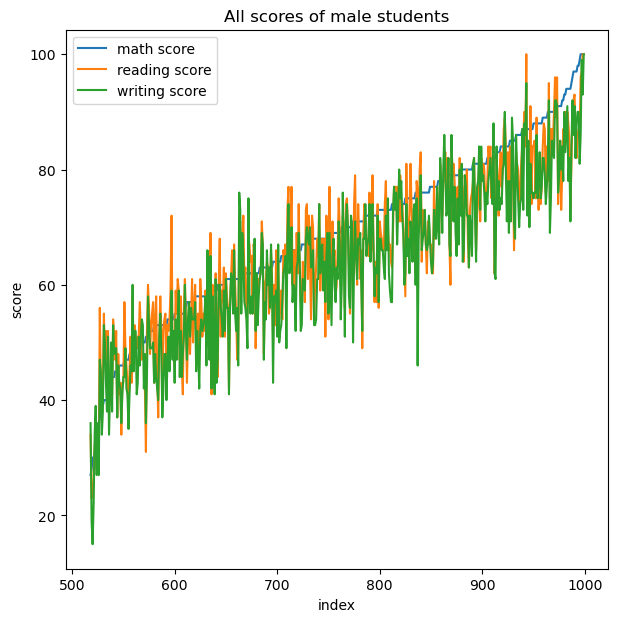

In [18]:
sp[sp['gender']=='male'][['math score','reading score','writing score']].plot(figsize=(7,7),title='All scores of male students',ylabel='score',xlabel='index');

As we can see in the above chart, male students scored more in reading and writing when compared to the math score.
The lowest score in this chart is around 10.

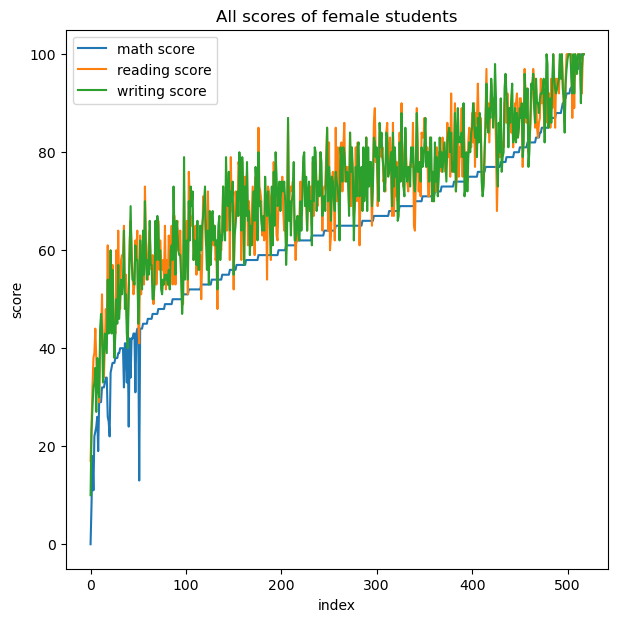

In [19]:
sp[sp['gender']=='female'][['math score','reading score','writing score']].plot(figsize=(7,7),title='All scores of female students',ylabel='score',xlabel='index');

As we can see in the above chart, female students scored more in reading and writing when compared to the math score.
The lowest score in this chart is 0.

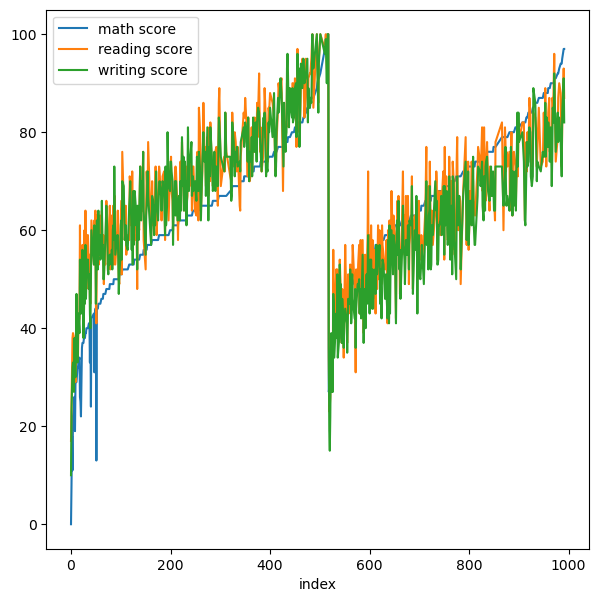

In [20]:
sp[sp['test preparation course']=='none'][['math score','reading score','writing score']].plot(figsize=(7,7),xlabel='index');

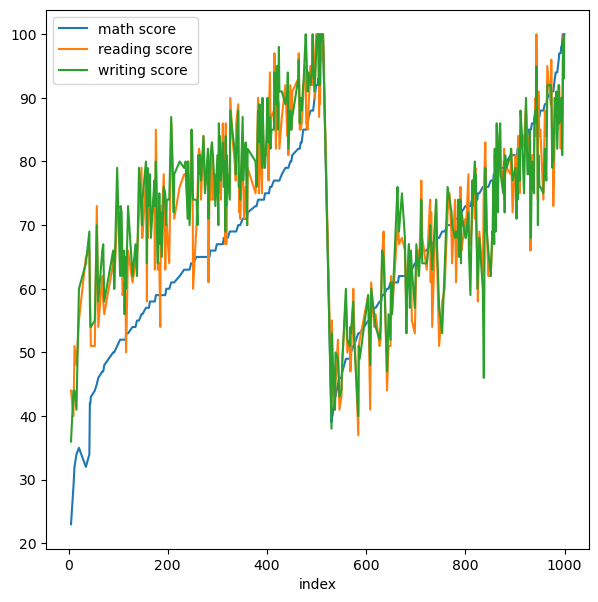

In [21]:
sp[sp['test preparation course']=='completed'][['math score','reading score','writing score']].plot(figsize=(7,7),xlabel='index');

# 5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.

In [22]:
sp.sort_values('math score',ascending=False).head(250)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
999,male,group E,bachelor's degree,standard,completed,100,100,100,100.000000
996,male,group A,some college,standard,completed,100,96,86,94.000000
515,female,group E,some college,standard,none,100,92,97,96.333333
517,female,group E,associate's degree,standard,none,100,100,100,100.000000
516,female,group E,bachelor's degree,standard,none,100,100,100,100.000000
...,...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77,76.666667
855,male,group E,associate's degree,free/reduced,completed,77,69,68,71.333333
854,male,group D,some high school,standard,completed,77,68,69,71.333333
853,male,group D,associate's degree,free/reduced,none,77,78,73,76.000000


Here is the list of the top 25% students based on their math score.
So the management could just select these students and give them bonus points.